In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def MSE(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    error = (Y_pred - Y)**2
    return np.mean(error)

In [4]:
class LinearRegressionCalculus:
    def __init__(self):
        self.beta_0 = None
        self.beta_1 = None

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)

        n = len(X)
        sum_x = np.sum(X)
        sum_x2 = np.sum(X ** 2)

        sum_y = np.sum(Y)
        sum_xy = np.sum(X*Y)

        MAT1 = np.array([[n, sum_x],[sum_x, sum_x2]])
        MAT2 = np.array([[sum_y],[sum_xy]])

        inv_MAT1 = np.linalg.inv(MAT1)
        self.beta_0, self.beta_1 = (inv_MAT1 @ MAT2).flatten()
    def predict(self, X):
        X = np.array(X)
        return self.beta_0 + self.beta_1 * X

In [5]:
df = pd.read_csv('datasets/q1_data.csv')

In [6]:
df.head(5)

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


In [7]:
X, Y = df['experience'], df['salary']

In [8]:
model = LinearRegressionCalculus()
model.fit(X, Y)
print(f'Coefficients are {model.beta_1}, {model.beta_0}')
pred = model.predict(X)

Coefficients are 1.5670982931135957, -0.035638610947623606


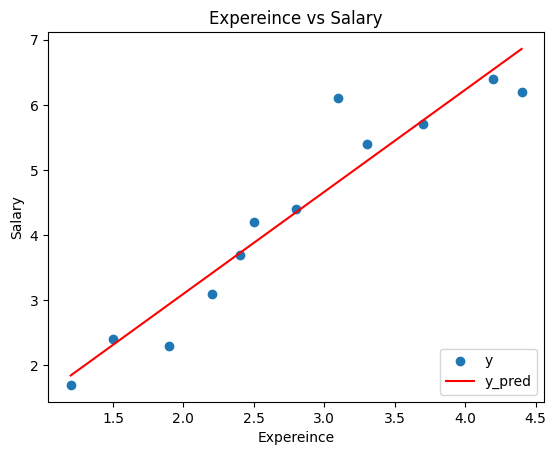

In [9]:
plt.scatter(X, Y, label='y')
plt.plot(X, pred, c='red', label='y_pred')
plt.title('Expereince vs Salary')
plt.xlabel('Expereince')
plt.ylabel('Salary')
plt.legend(loc='lower right')
plt.show()

In [10]:
X = np.array(X)

In [11]:
def predict(X, beta_0, beta_1):
    return beta_0 + beta_1 * X

In [12]:
pred_0_1 = predict(X, 1.1, 0.1)
pred_0_8 = predict(X, 1.1, 0.8)
pred_1_5 = predict(X, 1.1, 1.5)

print(f'intercept=1.1, slope=0.1 MSE:{MSE(Y, pred_0_1)}')
print(f'intercept=1.1, slope=0.8 MSE:{MSE(Y, pred_0_8)}')
print(f'intercept=1.1, slope=1.5 MSE:{MSE(Y, pred_1_5)}')

intercept=1.1, slope=0.1 MSE:10.81115
intercept=1.1, slope=0.8 MSE:1.762599999999999
intercept=1.1, slope=1.5 MSE:1.1404166666666662


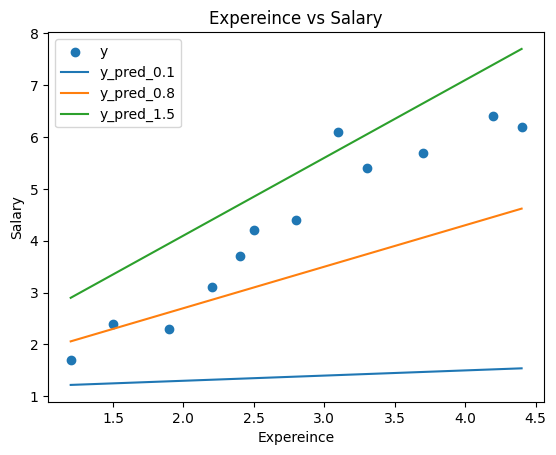

In [13]:
plt.scatter(X, Y, label='y')
plt.plot(X, pred_0_1, label='y_pred_0.1')
plt.plot(X, pred_0_8, label='y_pred_0.8')
plt.plot(X, pred_1_5, label='y_pred_1.5')
plt.xlabel('Expereince')
plt.ylabel('Salary')
plt.title('Expereince vs Salary')
plt.legend(loc='upper left')
plt.show()

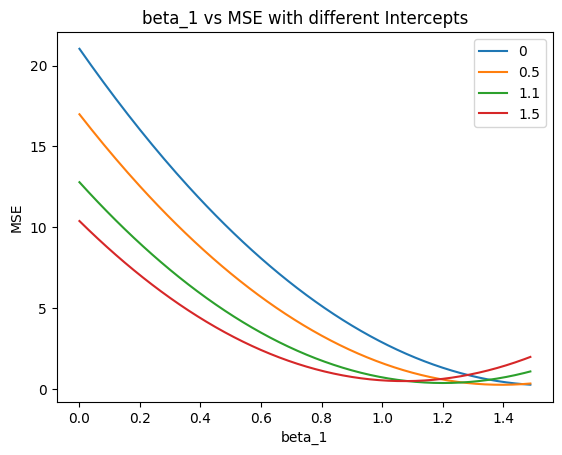

In [14]:
betas = np.arange(0, 1.5, 0.01)
intercepts = [0, 0.5, 1.1, 1.5]

for intercept in intercepts:
    MSEs= []
    for beta in betas:
        MSEs.append(MSE(Y, predict(X, intercept, beta)))
    plt.plot(betas, MSEs, label=f'{intercept}')

plt.xlabel('beta_1')
plt.ylabel('MSE')
plt.title('beta_1 vs MSE with different Intercepts')
plt.legend()
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
model = LinearRegression()
model.fit(X.reshape((-1, 1)), np.array(Y).reshape((-1,1)))

pred = model.predict(X.reshape((-1,1)))

In [22]:
mean_squared_error(np.array(Y).reshape((-1, 1)), pred)

0.23366710810280558